In [1364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1365]:
df=pd.read_csv('../Data/Clean_Data.csv')

In [1366]:
pd.options.display.max_columns=30

## Dropping Columns

#### -> For the Analysis, ID, Social Security Number and Type of Loan are not required and hence these columns are dropped.

In [1367]:
df = df.drop(['Unnamed: 0','ID', 'SSN','Type_of_Loan'], axis=1)

In [1368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90712 entries, 0 to 90711
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               90712 non-null  object 
 1   Month                     90712 non-null  object 
 2   Name                      90712 non-null  object 
 3   Age                       90712 non-null  int64  
 4   Occupation                90712 non-null  object 
 5   Annual_Income             90712 non-null  int64  
 6   Monthly_Inhand_Salary     90712 non-null  int64  
 7   Num_Bank_Accounts         90712 non-null  int64  
 8   Num_Credit_Card           90712 non-null  int64  
 9   Interest_Rate             90712 non-null  float64
 10  Num_of_Loan               90712 non-null  int64  
 11  Delay_from_due_date       90712 non-null  int64  
 12  Num_of_Delayed_Payment    90712 non-null  int64  
 13  Changed_Credit_Limit      90712 non-null  float64
 14  Num_Cr

In [1369]:
df.describe(include='object')

,Customer_ID,Month,Name,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
count,90712,90712,90712,90712,90712,90712,90712
unique,11339,8,9357,15,3,2,7
top,CUS_0xd40,January,langep,Lawyer,Standard,Yes,Low_spent_Small_value_payments
freq,8,11339,48,6456,41424,54000,23248


In [1370]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000,90712.000000
mean,33.072493,50333.145339,4183.763118,6.139695,6.461857,15.036169,3.911478,21.088235,13.509536,10.366871,8.066673,1428.985945,32.289241,16.753947,107.826763,613.960105,386.945669
std,10.751024,38234.448321,3181.397480,3.361540,2.778904,9.248073,2.949332,14.903027,6.232607,6.776005,5.297825,1155.463846,5.116309,7.829558,104.371564,1998.287524,173.784361
min,14.000000,7006.000000,304.000000,0.000000,1.000000,1.000000,0.000000,-5.000000,0.000000,-6.490000,0.000000,0.540000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,19296.000000,1624.000000,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.310000,4.000000,566.980000,28.054463,11.000000,30.473954,77.000000,270.731517
50%,33.000000,36898.000000,3080.000000,6.000000,6.000000,14.000000,3.000000,18.000000,14.000000,9.380000,7.000000,1169.610000,32.321147,16.000000,69.246684,136.000000,336.719190
75%,41.000000,71537.000000,5942.000000,8.000000,9.000000,20.000000,6.000000,28.000000,18.000000,14.820000,11.000000,1953.630000,36.497700,23.000000,160.205225,254.000000,465.807584
max,56.000000,179987.000000,15205.000000,13.000000,11.000000,38.000000,12.000000,67.000000,31.000000,36.970000,18.000000,4998.070000,50.000000,33.000000,357.600632,10000.000000,770.412152


# Sample Plot before Data Aggregation

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Total_EMI_per_month'>

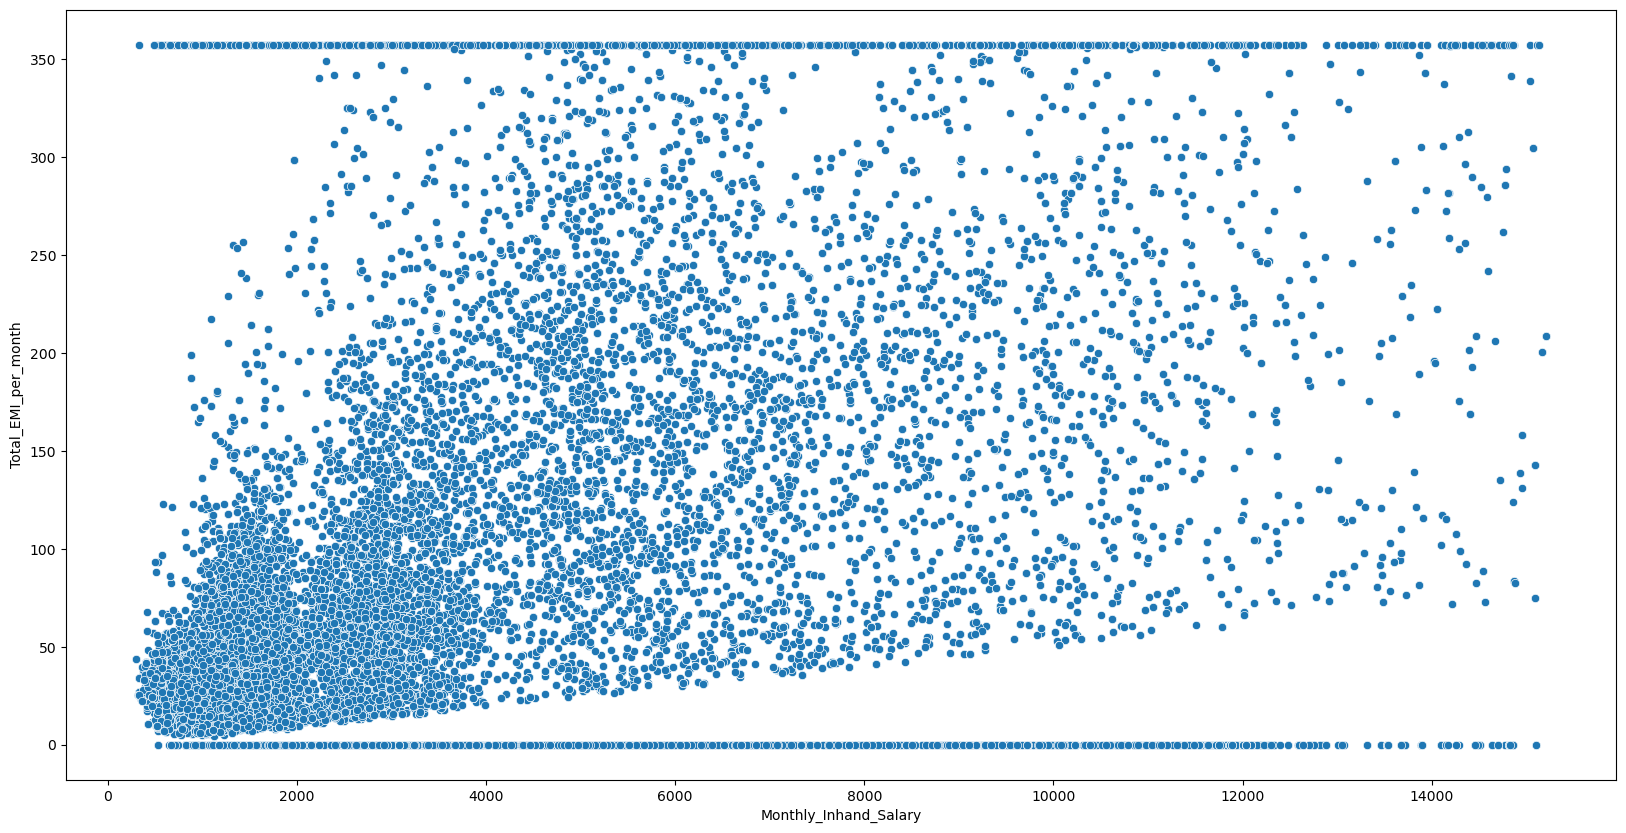

In [1371]:
plt.figure(figsize=(20,10))

sns.scatterplot(x='Monthly_Inhand_Salary',y='Total_EMI_per_month',data=df1)

## Data Aggregation on Customer Level

In [1372]:
Numeric_Agg=df.groupby(['Customer_ID','Name'])[['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']].aggregate('mean').reset_index()

In [1373]:
String_Agg=df.groupby(['Customer_ID','Name'])[['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']].agg(pd.Series.mode).reset_index()

In [1374]:
data=Numeric_Agg.merge(String_Agg,left_on='Customer_ID',right_on='Customer_ID')
data

,Customer_ID,Name_x,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Name_y,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,CUS_0x1000,alistair barrf,17.0,30626.0,2706.0,6.0,5.0,27.0,2.0,62.250,25.000,1.880,11.0,1562.91,33.477546,10.0,42.941090,158.625,335.375341,alistair barrf,Lawyer,Bad,Yes,"[High_spent_Medium_value_payments, High_spent_..."
1,CUS_0x1009,arunah,25.0,52313.0,4250.0,6.0,5.0,17.0,5.0,7.250,19.500,9.730,4.0,202.68,29.839984,27.0,108.366467,146.625,428.743155,arunah,Mechanic,Standard,Yes,High_spent_Medium_value_payments
2,CUS_0x100b,shirboni,18.0,113781.0,9550.0,1.0,4.0,1.0,0.0,13.500,7.375,10.965,18.0,1030.20,34.841449,14.0,0.000000,1646.000,687.526125,shirboni,Media_Manager,Good,No,High_spent_Large_value_payments
3,CUS_0x1011,schneyerh,43.0,58918.0,5209.0,3.0,3.0,17.0,3.0,27.250,14.375,14.170,18.0,473.14,27.655897,16.0,123.434939,1522.125,332.642837,schneyerh,Doctor,Standard,Yes,Low_spent_Medium_value_payments
4,CUS_0x1015,holtono,27.0,46951.0,3726.0,7.0,4.0,16.0,0.0,8.000,9.125,16.330,9.0,340.22,35.182883,18.0,0.000000,231.875,398.217749,holtono,Journalist,Standard,Yes,Low_spent_Medium_value_payments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11334,CUS_0xfea,ethanj,33.0,44264.0,3756.0,3.0,3.0,6.0,2.0,11.750,2.125,9.535,3.0,1312.23,34.016291,16.0,40.482424,282.625,328.799232,ethanj,Manager,Good,No,Low_spent_Medium_value_payments
11335,CUS_0xff3,somervilled,55.0,17033.0,1176.0,0.0,11.0,6.5,3.0,12.250,8.625,8.485,5.0,1229.08,32.889398,15.0,33.299764,83.750,271.671562,somervilled,Scientist,Good,No,Low_spent_Small_value_payments
11336,CUS_0xff4,poornimaf,36.0,25546.0,2416.0,8.0,7.0,14.0,5.0,15.875,12.125,8.205,5.0,758.44,32.598257,16.0,101.328637,152.750,259.981173,poornimaf,Entrepreneur,Standard,Yes,Low_spent_Small_value_payments
11337,CUS_0xff6,shieldsb,18.0,117640.0,9727.0,5.0,6.0,1.0,2.0,-0.125,5.250,11.900,2.0,338.30,33.258053,25.0,126.638453,1758.500,587.903493,shieldsb,Doctor,Good,No,"[High_spent_Small_value_payments, Low_spent_Sm..."


## Removing Duplicate Columns

#### -> Duplicate Columns are removed.
#### -> Index is set to Customer_ID


In [1375]:
data.drop(['Name_y'],axis=1,inplace=True)

In [1376]:
data.index=data.Customer_ID.str.lower()

In [1377]:
data.drop(['Customer_ID'],axis=1,inplace=True)

In [1378]:
data

,Name_x,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
Customer_ID,,,,,,,,,,,,,,,,,,,,,,
cus_0x1000,alistair barrf,17.0,30626.0,2706.0,6.0,5.0,27.0,2.0,62.250,25.000,1.880,11.0,1562.91,33.477546,10.0,42.941090,158.625,335.375341,Lawyer,Bad,Yes,"[High_spent_Medium_value_payments, High_spent_..."
cus_0x1009,arunah,25.0,52313.0,4250.0,6.0,5.0,17.0,5.0,7.250,19.500,9.730,4.0,202.68,29.839984,27.0,108.366467,146.625,428.743155,Mechanic,Standard,Yes,High_spent_Medium_value_payments
cus_0x100b,shirboni,18.0,113781.0,9550.0,1.0,4.0,1.0,0.0,13.500,7.375,10.965,18.0,1030.20,34.841449,14.0,0.000000,1646.000,687.526125,Media_Manager,Good,No,High_spent_Large_value_payments
cus_0x1011,schneyerh,43.0,58918.0,5209.0,3.0,3.0,17.0,3.0,27.250,14.375,14.170,18.0,473.14,27.655897,16.0,123.434939,1522.125,332.642837,Doctor,Standard,Yes,Low_spent_Medium_value_payments
cus_0x1015,holtono,27.0,46951.0,3726.0,7.0,4.0,16.0,0.0,8.000,9.125,16.330,9.0,340.22,35.182883,18.0,0.000000,231.875,398.217749,Journalist,Standard,Yes,Low_spent_Medium_value_payments
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cus_0xfea,ethanj,33.0,44264.0,3756.0,3.0,3.0,6.0,2.0,11.750,2.125,9.535,3.0,1312.23,34.016291,16.0,40.482424,282.625,328.799232,Manager,Good,No,Low_spent_Medium_value_payments
cus_0xff3,somervilled,55.0,17033.0,1176.0,0.0,11.0,6.5,3.0,12.250,8.625,8.485,5.0,1229.08,32.889398,15.0,33.299764,83.750,271.671562,Scientist,Good,No,Low_spent_Small_value_payments
cus_0xff4,poornimaf,36.0,25546.0,2416.0,8.0,7.0,14.0,5.0,15.875,12.125,8.205,5.0,758.44,32.598257,16.0,101.328637,152.750,259.981173,Entrepreneur,Standard,Yes,Low_spent_Small_value_payments


### -> We rename the columns as per our requirement 

In [1379]:
data.rename(columns={'Name_x':'Name','Monthly_Inhand_Salary':'Monthly_Salary','Num_Bank_Accounts':'Bank_Accounts'},inplace=True)

In [1380]:
data.rename(columns={'Num_Credit_Card':'Credit_Cards','Num_of_Loan':'Loans','Num_of_Delayed_Payment':'Delayed_Payments'},inplace=True)

In [1381]:
data.rename(columns={'Changed_Credit_Limit':'Credit_Limit_Change_%','Num_Credit_Inquiries':'Credit_Inquiries'},inplace=True)

In [1382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11339 entries, cus_0x1000 to cus_0xffc
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      11339 non-null  object 
 1   Age                       11339 non-null  float64
 2   Annual_Income             11339 non-null  float64
 3   Monthly_Salary            11339 non-null  float64
 4   Bank_Accounts             11339 non-null  float64
 5   Credit_Cards              11339 non-null  float64
 6   Interest_Rate             11339 non-null  float64
 7   Loans                     11339 non-null  float64
 8   Delay_from_due_date       11339 non-null  float64
 9   Delayed_Payments          11339 non-null  float64
 10  Credit_Limit_Change_%     11339 non-null  float64
 11  Credit_Inquiries          11339 non-null  float64
 12  Outstanding_Debt          11339 non-null  float64
 13  Credit_Utilization_Ratio  11339 non-null  float64
 14

In [1383]:
data['EMI_Percentage']=np.round((data.Total_EMI_per_month/data.Monthly_Salary)*100,2)

In [1384]:
data['Investment_Percentage']=np.round((data.Amount_invested_monthly/data.Monthly_Salary)*100,2)

In [1385]:
data

,Name,Age,Annual_Income,Monthly_Salary,Bank_Accounts,Credit_Cards,Interest_Rate,Loans,Delay_from_due_date,Delayed_Payments,Credit_Limit_Change_%,Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,EMI_Percentage,Investment_Percentage
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,
cus_0x1000,alistair barrf,17.0,30626.0,2706.0,6.0,5.0,27.0,2.0,62.250,25.000,1.880,11.0,1562.91,33.477546,10.0,42.941090,158.625,335.375341,Lawyer,Bad,Yes,"[High_spent_Medium_value_payments, High_spent_...",1.59,5.86
cus_0x1009,arunah,25.0,52313.0,4250.0,6.0,5.0,17.0,5.0,7.250,19.500,9.730,4.0,202.68,29.839984,27.0,108.366467,146.625,428.743155,Mechanic,Standard,Yes,High_spent_Medium_value_payments,2.55,3.45
cus_0x100b,shirboni,18.0,113781.0,9550.0,1.0,4.0,1.0,0.0,13.500,7.375,10.965,18.0,1030.20,34.841449,14.0,0.000000,1646.000,687.526125,Media_Manager,Good,No,High_spent_Large_value_payments,0.00,17.24
cus_0x1011,schneyerh,43.0,58918.0,5209.0,3.0,3.0,17.0,3.0,27.250,14.375,14.170,18.0,473.14,27.655897,16.0,123.434939,1522.125,332.642837,Doctor,Standard,Yes,Low_spent_Medium_value_payments,2.37,29.22
cus_0x1015,holtono,27.0,46951.0,3726.0,7.0,4.0,16.0,0.0,8.000,9.125,16.330,9.0,340.22,35.182883,18.0,0.000000,231.875,398.217749,Journalist,Standard,Yes,Low_spent_Medium_value_payments,0.00,6.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cus_0xfea,ethanj,33.0,44264.0,3756.0,3.0,3.0,6.0,2.0,11.750,2.125,9.535,3.0,1312.23,34.016291,16.0,40.482424,282.625,328.799232,Manager,Good,No,Low_spent_Medium_value_payments,1.08,7.52
cus_0xff3,somervilled,55.0,17033.0,1176.0,0.0,11.0,6.5,3.0,12.250,8.625,8.485,5.0,1229.08,32.889398,15.0,33.299764,83.750,271.671562,Scientist,Good,No,Low_spent_Small_value_payments,2.83,7.12
cus_0xff4,poornimaf,36.0,25546.0,2416.0,8.0,7.0,14.0,5.0,15.875,12.125,8.205,5.0,758.44,32.598257,16.0,101.328637,152.750,259.981173,Entrepreneur,Standard,Yes,Low_spent_Small_value_payments,4.19,6.32


# Creating Labels for the Columns

In [1386]:
labels=pd.DataFrame([])

## Age

#### Range : [(13.958, 28.0] < (28.0, 42.0] < (42.0, 56.0]
#### Label   : ['Teen' < 'Adult' < 'Middle Age']

In [1387]:
pd.cut(data.Age,bins=3,labels=['Teen','Adult','Middle Age'])

Customer_ID
cus_0x1000          Teen
cus_0x1009          Teen
cus_0x100b          Teen
cus_0x1011    Middle Age
cus_0x1015          Teen
                 ...    
cus_0xfea          Adult
cus_0xff3     Middle Age
cus_0xff4          Adult
cus_0xff6           Teen
cus_0xffc           Teen
Name: Age, Length: 11339, dtype: category
Categories (3, object): ['Teen' < 'Adult' < 'Middle Age']

In [1388]:
labels['Age']=pd.cut(data.Age,bins=3,labels=['Teen','Adult','Middle Age'])
data['Age_Category']=pd.cut(data.Age,bins=3,labels=['Teen','Adult','Middle Age'])

# Labels and Scaling the Values

### Categorized the Columns in to bins of 3 or 2 with numeric values of 1,2,3 being assigned as labels.

### 3 represents High or Good, 2 - Medium or Standard and 1 - Low or Poor.

### Age -> 3 bins categorizing Teen, Adult and Middle Age

## Annual Income


#### Range : (6833.019, 64666.333] < (64666.333, 122326.667] < (122326.667, 179987.0]
#### Label : 1 < 2 < 3

## Monthly Salary

#### Range : (289.099, 5271.0] < (5271.0, 10238.0] < (10238.0, 15205.0]
#### Label :  1 < 2 < 3 



In [1389]:
pd.cut(data.Annual_Income,bins=3)

Customer_ID
cus_0x1000      (6833.019, 64666.333]
cus_0x1009      (6833.019, 64666.333]
cus_0x100b    (64666.333, 122326.667]
cus_0x1011      (6833.019, 64666.333]
cus_0x1015      (6833.019, 64666.333]
                       ...           
cus_0xfea       (6833.019, 64666.333]
cus_0xff3       (6833.019, 64666.333]
cus_0xff4       (6833.019, 64666.333]
cus_0xff6     (64666.333, 122326.667]
cus_0xffc       (6833.019, 64666.333]
Name: Annual_Income, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(6833.019, 64666.333] < (64666.333, 122326.667] < (122326.667, 179987.0]]

In [1390]:
labels['Annual_Income']=pd.cut(data.Annual_Income,bins=3,labels=[1, 2, 3])

In [1391]:
labels.Annual_Income.value_counts()

1    8021
2    2543
3     775
Name: Annual_Income, dtype: int64

In [1392]:
pd.cut(data.Monthly_Salary,bins=3)

Customer_ID
cus_0x1000    (289.099, 5271.0]
cus_0x1009    (289.099, 5271.0]
cus_0x100b    (5271.0, 10238.0]
cus_0x1011    (289.099, 5271.0]
cus_0x1015    (289.099, 5271.0]
                    ...        
cus_0xfea     (289.099, 5271.0]
cus_0xff3     (289.099, 5271.0]
cus_0xff4     (289.099, 5271.0]
cus_0xff6     (5271.0, 10238.0]
cus_0xffc     (289.099, 5271.0]
Name: Monthly_Salary, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(289.099, 5271.0] < (5271.0, 10238.0] < (10238.0, 15205.0]]

In [1393]:
labels['Monthly_Salary']=pd.cut(data.Monthly_Salary,bins=3,labels=[1, 2, 3])

In [1394]:
labels.Monthly_Salary.value_counts()

1    7925
2    2675
3     739
Name: Monthly_Salary, dtype: int64

# Bank_Accounts

#### Range : [(-0.013, 4.333] > (4.333, 8.667] > (8.667, 13.0]
#### Label : 3 > 2 > 1

# Credit_Cards

#### Range : [(0.99, 4.333] > (4.333, 7.667] > (7.667, 11.0]]
#### Label : 3 > 2 > 1


### Less number of Bank Accounts and Credit Cards are good for Credit Worthiness.

In [1395]:
pd.cut(data.Bank_Accounts,bins=3)

Customer_ID
cus_0x1000     (4.333, 8.667]
cus_0x1009     (4.333, 8.667]
cus_0x100b    (-0.013, 4.333]
cus_0x1011    (-0.013, 4.333]
cus_0x1015     (4.333, 8.667]
                   ...       
cus_0xfea     (-0.013, 4.333]
cus_0xff3     (-0.013, 4.333]
cus_0xff4      (4.333, 8.667]
cus_0xff6      (4.333, 8.667]
cus_0xffc      (4.333, 8.667]
Name: Bank_Accounts, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-0.013, 4.333] < (4.333, 8.667] < (8.667, 13.0]]

In [1396]:
labels['Bank_Accounts']=pd.cut(data.Bank_Accounts,bins=3,labels=[3, 2, 1])

In [1397]:
labels['Bank_Accounts'].value_counts()

2    5233
3    3851
1    2255
Name: Bank_Accounts, dtype: int64

In [1398]:
pd.cut(data.Credit_Cards,bins=3)

Customer_ID
cus_0x1000    (4.333, 7.667]
cus_0x1009    (4.333, 7.667]
cus_0x100b     (0.99, 4.333]
cus_0x1011     (0.99, 4.333]
cus_0x1015     (0.99, 4.333]
                   ...      
cus_0xfea      (0.99, 4.333]
cus_0xff3      (7.667, 11.0]
cus_0xff4     (4.333, 7.667]
cus_0xff6     (4.333, 7.667]
cus_0xffc      (7.667, 11.0]
Name: Credit_Cards, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(0.99, 4.333] < (4.333, 7.667] < (7.667, 11.0]]

In [1399]:
labels['Credit_Cards']=pd.cut(data.Credit_Cards,bins=3,labels=[3, 2, 1])

In [1400]:
labels['Credit_Cards'].value_counts()

2    4989
1    3326
3    3024
Name: Credit_Cards, dtype: int64

## Loans

#### Range : [(-0.0101, 3.375] > (3.375, 6.75] > (6.75, 10.125]]
#### Label : 3 > 2 > 1

## Delay_from_due_date

#### Range : [(-2.065, 19.75] > (19.75, 41.5] > (41.5, 63.25]]
#### Label : 3 > 2 > 1

## Delayed_Payments

#### Range : [(-0.0264, 8.792] > (8.792, 17.583] > (17.583, 26.375]]
#### Label : 3 > 2 > 1

### Less number of Loans, Lesser days delayed from payment day and Lesser No. of delayed payments are Good.

## Credit_Limit_Change_%

#### Range : [(-1.102, 9.658] < (9.658, 20.387] < (20.387, 31.115]]
#### Label : 1 < 2 < 3


In [1401]:
pd.cut(data.Loans,bins=3)

Customer_ID
cus_0x1000    (-0.0101, 3.375]
cus_0x1009       (3.375, 6.75]
cus_0x100b    (-0.0101, 3.375]
cus_0x1011    (-0.0101, 3.375]
cus_0x1015    (-0.0101, 3.375]
                    ...       
cus_0xfea     (-0.0101, 3.375]
cus_0xff3     (-0.0101, 3.375]
cus_0xff4        (3.375, 6.75]
cus_0xff6     (-0.0101, 3.375]
cus_0xffc       (6.75, 10.125]
Name: Loans, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-0.0101, 3.375] < (3.375, 6.75] < (6.75, 10.125]]

In [1402]:
labels['Loans']=pd.cut(data.Loans,bins=3,labels=[3, 2, 1])

In [1403]:
labels['Loans'].value_counts()

3    5418
2    4172
1    1749
Name: Loans, dtype: int64

In [1404]:
pd.cut(data.Delay_from_due_date ,bins=3)

Customer_ID
cus_0x1000      (41.5, 63.25]
cus_0x1009    (-2.065, 19.75]
cus_0x100b    (-2.065, 19.75]
cus_0x1011      (19.75, 41.5]
cus_0x1015    (-2.065, 19.75]
                   ...       
cus_0xfea     (-2.065, 19.75]
cus_0xff3     (-2.065, 19.75]
cus_0xff4     (-2.065, 19.75]
cus_0xff6     (-2.065, 19.75]
cus_0xffc       (41.5, 63.25]
Name: Delay_from_due_date, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-2.065, 19.75] < (19.75, 41.5] < (41.5, 63.25]]

In [1405]:
labels['Delay_from_due_date']=pd.cut(data.Delay_from_due_date ,bins=3,labels=[3, 2, 1])

In [1406]:
labels['Delay_from_due_date'].value_counts()

3    6249
2    3715
1    1375
Name: Delay_from_due_date, dtype: int64

In [1407]:
pd.cut(data.Delayed_Payments,bins=3)

Customer_ID
cus_0x1000    (17.583, 26.375]
cus_0x1009    (17.583, 26.375]
cus_0x100b    (-0.0264, 8.792]
cus_0x1011     (8.792, 17.583]
cus_0x1015     (8.792, 17.583]
                    ...       
cus_0xfea     (-0.0264, 8.792]
cus_0xff3     (-0.0264, 8.792]
cus_0xff4      (8.792, 17.583]
cus_0xff6     (-0.0264, 8.792]
cus_0xffc      (8.792, 17.583]
Name: Delayed_Payments, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-0.0264, 8.792] < (8.792, 17.583] < (17.583, 26.375]]

In [1408]:
labels['Delayed_Payments']=pd.cut(data.Delayed_Payments,bins=3,labels=[3, 2, 1])

In [1409]:
labels['Delayed_Payments'].value_counts()

2    5810
1    3131
3    2398
Name: Delayed_Payments, dtype: int64

In [1410]:
pd.cut(data['Credit_Limit_Change_%'],bins=3)

Customer_ID
cus_0x1000    (-1.102, 9.658]
cus_0x1009    (9.658, 20.387]
cus_0x100b    (9.658, 20.387]
cus_0x1011    (9.658, 20.387]
cus_0x1015    (9.658, 20.387]
                   ...       
cus_0xfea     (-1.102, 9.658]
cus_0xff3     (-1.102, 9.658]
cus_0xff4     (-1.102, 9.658]
cus_0xff6     (9.658, 20.387]
cus_0xffc     (-1.102, 9.658]
Name: Credit_Limit_Change_%, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-1.102, 9.658] < (9.658, 20.387] < (20.387, 31.115]]

In [1411]:
labels['Credit_Limit_Change_%']=pd.cut(data['Credit_Limit_Change_%'],bins=3,labels=[1, 2, 3])

In [1412]:
labels['Credit_Limit_Change_%'].value_counts()

1    5912
2    4596
3     831
Name: Credit_Limit_Change_%, dtype: int64

# Credit_Inquiries

#### Range : [(-0.018, 6.0] > (6.0, 12.0] > (12.0, 18.0]]
#### Label : 3 > 2 > 1

## Outstanding_Debt

#### Range : [(-4.768, 1666.177] > (1666.177, 3332.123] > (3332.123, 4998.07]]
#### Label : 3 > 2 > 1

## Credit_Utilization_Ratio

#### Range : [(25.46, 31.116] > (31.116, 36.756] > (36.756, 42.395]]
#### Label : 3 > 2 > 1

## Credit_History_Age

#### Range : [(-0.033, 11.0] < (11.0, 22.0] < (22.0, 33.0]]
#### Label : 1 < 2 < 3

In [1413]:
pd.cut(data.Credit_Inquiries,bins=3)

Customer_ID
cus_0x1000      (6.0, 12.0]
cus_0x1009    (-0.018, 6.0]
cus_0x100b     (12.0, 18.0]
cus_0x1011     (12.0, 18.0]
cus_0x1015      (6.0, 12.0]
                  ...      
cus_0xfea     (-0.018, 6.0]
cus_0xff3     (-0.018, 6.0]
cus_0xff4     (-0.018, 6.0]
cus_0xff6     (-0.018, 6.0]
cus_0xffc      (12.0, 18.0]
Name: Credit_Inquiries, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-0.018, 6.0] < (6.0, 12.0] < (12.0, 18.0]]

In [1414]:
labels['Credit_Inquiries']=pd.cut(data.Credit_Inquiries,bins=3,labels=[3, 2, 1])

In [1415]:
labels['Credit_Inquiries'].value_counts()

3    5104
2    3976
1    2259
Name: Credit_Inquiries, dtype: int64

In [1416]:
pd.cut(data.Outstanding_Debt,bins=3)

Customer_ID
cus_0x1000    (-4.458, 1666.383]
cus_0x1009    (-4.458, 1666.383]
cus_0x100b    (-4.458, 1666.383]
cus_0x1011    (-4.458, 1666.383]
cus_0x1015    (-4.458, 1666.383]
                     ...        
cus_0xfea     (-4.458, 1666.383]
cus_0xff3     (-4.458, 1666.383]
cus_0xff4     (-4.458, 1666.383]
cus_0xff6     (-4.458, 1666.383]
cus_0xffc     (-4.458, 1666.383]
Name: Outstanding_Debt, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-4.458, 1666.383] < (1666.383, 3332.227] < (3332.227, 4998.07]]

In [1417]:
labels['Outstanding_Debt']=pd.cut(data.Outstanding_Debt,bins=3,labels=[3, 2, 1])

In [1418]:
labels['Outstanding_Debt'].value_counts()

3    8006
2    2283
1    1050
Name: Outstanding_Debt, dtype: int64

In [1419]:
pd.cut(data.Credit_Utilization_Ratio,bins=3)

Customer_ID
cus_0x1000    (31.116, 36.756]
cus_0x1009     (25.46, 31.116]
cus_0x100b    (31.116, 36.756]
cus_0x1011     (25.46, 31.116]
cus_0x1015    (31.116, 36.756]
                    ...       
cus_0xfea     (31.116, 36.756]
cus_0xff3     (31.116, 36.756]
cus_0xff4     (31.116, 36.756]
cus_0xff6     (31.116, 36.756]
cus_0xffc     (31.116, 36.756]
Name: Credit_Utilization_Ratio, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(25.46, 31.116] < (31.116, 36.756] < (36.756, 42.395]]

In [1420]:
labels['Credit_Utilization_Ratio']=pd.cut(data.Credit_Utilization_Ratio,bins=3,labels=[3, 2, 1])

In [1421]:
labels['Credit_Utilization_Ratio'].value_counts()

2    7736
3    3358
1     245
Name: Credit_Utilization_Ratio, dtype: int64

In [1422]:
pd.cut(data.Credit_History_Age,bins=3)

Customer_ID
cus_0x1000    (-0.033, 11.0]
cus_0x1009      (22.0, 33.0]
cus_0x100b      (11.0, 22.0]
cus_0x1011      (11.0, 22.0]
cus_0x1015      (11.0, 22.0]
                   ...      
cus_0xfea       (11.0, 22.0]
cus_0xff3       (11.0, 22.0]
cus_0xff4       (11.0, 22.0]
cus_0xff6       (22.0, 33.0]
cus_0xffc     (-0.033, 11.0]
Name: Credit_History_Age, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-0.033, 11.0] < (11.0, 22.0] < (22.0, 33.0]]

In [1423]:
labels['Credit_History_Age']=pd.cut(data.Credit_History_Age,bins=3,labels=[1, 2, 3])

In [1424]:
labels['Credit_History_Age'].value_counts()

2    5332
1    3141
3    2866
Name: Credit_History_Age, dtype: int64

## EMI

#### [(-0.0273, 9.09] > (9.09, 18.18] > (18.18, 27.27]]
#### 3 > 2 > 1
## Investment

#### [(0.839, 168.33] < (168.33, 335.32] < (335.32, 502.31]
#### 1 < 2 < 3

## Credit Mix

#### Bad : 1 
#### Standard : 2
#### Good : 3

## Minimum Payment

#### Yes : 1
#### No : 0

In [1425]:
pd.cut(data.EMI_Percentage,bins=3)

Customer_ID
cus_0x1000    (-0.0273, 9.09]
cus_0x1009    (-0.0273, 9.09]
cus_0x100b    (-0.0273, 9.09]
cus_0x1011    (-0.0273, 9.09]
cus_0x1015    (-0.0273, 9.09]
                   ...       
cus_0xfea     (-0.0273, 9.09]
cus_0xff3     (-0.0273, 9.09]
cus_0xff4     (-0.0273, 9.09]
cus_0xff6     (-0.0273, 9.09]
cus_0xffc     (-0.0273, 9.09]
Name: EMI_Percentage, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(-0.0273, 9.09] < (9.09, 18.18] < (18.18, 27.27]]

In [1426]:
labels['EMI']=pd.cut(data.EMI_Percentage,bins=3,labels=[3,2,1])

In [1427]:
labels['EMI'].value_counts()

3    11019
2      306
1       14
Name: EMI, dtype: int64

In [1428]:
pd.cut(data.Investment_Percentage,bins=3)

Customer_ID
cus_0x1000    (0.839, 168.33]
cus_0x1009    (0.839, 168.33]
cus_0x100b    (0.839, 168.33]
cus_0x1011    (0.839, 168.33]
cus_0x1015    (0.839, 168.33]
                   ...       
cus_0xfea     (0.839, 168.33]
cus_0xff3     (0.839, 168.33]
cus_0xff4     (0.839, 168.33]
cus_0xff6     (0.839, 168.33]
cus_0xffc     (0.839, 168.33]
Name: Investment_Percentage, Length: 11339, dtype: category
Categories (3, interval[float64, right]): [(0.839, 168.33] < (168.33, 335.32] < (335.32, 502.31]]

In [1429]:

labels['Investment']=pd.cut(data.Investment_Percentage,bins=3,labels=[3,2,1])

In [1430]:
labels['Investment'].value_counts()

3    11117
2      195
1       27
Name: Investment, dtype: int64

In [1431]:
labels['Occupation']=data.Occupation

In [1432]:
labels['Credit_Mix']=data.Credit_Mix.apply(lambda x : 1 if x=='Bad'
              else (2 if x=='Standard' else 3))

In [1433]:
labels['Minimum_Payment']=data['Payment_of_Min_Amount'].map({'Yes':1,'No':0})

In [1434]:
data

,Name,Age,Annual_Income,Monthly_Salary,Bank_Accounts,Credit_Cards,Interest_Rate,Loans,Delay_from_due_date,Delayed_Payments,Credit_Limit_Change_%,Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,EMI_Percentage,Investment_Percentage,Age_Category
Customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,
cus_0x1000,alistair barrf,17.0,30626.0,2706.0,6.0,5.0,27.0,2.0,62.250,25.000,1.880,11.0,1562.91,33.477546,10.0,42.941090,158.625,335.375341,Lawyer,Bad,Yes,"[High_spent_Medium_value_payments, High_spent_...",1.59,5.86,Teen
cus_0x1009,arunah,25.0,52313.0,4250.0,6.0,5.0,17.0,5.0,7.250,19.500,9.730,4.0,202.68,29.839984,27.0,108.366467,146.625,428.743155,Mechanic,Standard,Yes,High_spent_Medium_value_payments,2.55,3.45,Teen
cus_0x100b,shirboni,18.0,113781.0,9550.0,1.0,4.0,1.0,0.0,13.500,7.375,10.965,18.0,1030.20,34.841449,14.0,0.000000,1646.000,687.526125,Media_Manager,Good,No,High_spent_Large_value_payments,0.00,17.24,Teen
cus_0x1011,schneyerh,43.0,58918.0,5209.0,3.0,3.0,17.0,3.0,27.250,14.375,14.170,18.0,473.14,27.655897,16.0,123.434939,1522.125,332.642837,Doctor,Standard,Yes,Low_spent_Medium_value_payments,2.37,29.22,Middle Age
cus_0x1015,holtono,27.0,46951.0,3726.0,7.0,4.0,16.0,0.0,8.000,9.125,16.330,9.0,340.22,35.182883,18.0,0.000000,231.875,398.217749,Journalist,Standard,Yes,Low_spent_Medium_value_payments,0.00,6.22,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cus_0xfea,ethanj,33.0,44264.0,3756.0,3.0,3.0,6.0,2.0,11.750,2.125,9.535,3.0,1312.23,34.016291,16.0,40.482424,282.625,328.799232,Manager,Good,No,Low_spent_Medium_value_payments,1.08,7.52,Adult
cus_0xff3,somervilled,55.0,17033.0,1176.0,0.0,11.0,6.5,3.0,12.250,8.625,8.485,5.0,1229.08,32.889398,15.0,33.299764,83.750,271.671562,Scientist,Good,No,Low_spent_Small_value_payments,2.83,7.12,Middle Age
cus_0xff4,poornimaf,36.0,25546.0,2416.0,8.0,7.0,14.0,5.0,15.875,12.125,8.205,5.0,758.44,32.598257,16.0,101.328637,152.750,259.981173,Entrepreneur,Standard,Yes,Low_spent_Small_value_payments,4.19,6.32,Adult


In [1435]:
data = data.drop(['Interest_Rate','Credit_Limit_Change_%','Total_EMI_per_month','Amount_invested_monthly','Payment_Behaviour'], axis=1)

In [1436]:
data.to_csv('../Data/Clean_Data_2.csv')

In [1437]:
labels.to_csv('../Data/Labels_Data.csv')